In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances


In [80]:
df = pd.read_csv('/content/Financial Distress.csv')

In [82]:
data_features = df.drop(['Company','Time'], axis=1)

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

In [86]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(df_scaled)
cluster_labels = gmm.predict(df_scaled)


In [87]:
df['Cluster'] = cluster_labels

In [88]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data = df_pca, columns = ['PC1', 'PC2'])
principal_df['Cluster'] = cluster_labels

<ipython-input-89-455aa77049fe>:3: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', style='Cluster', markers=['o', 's'])


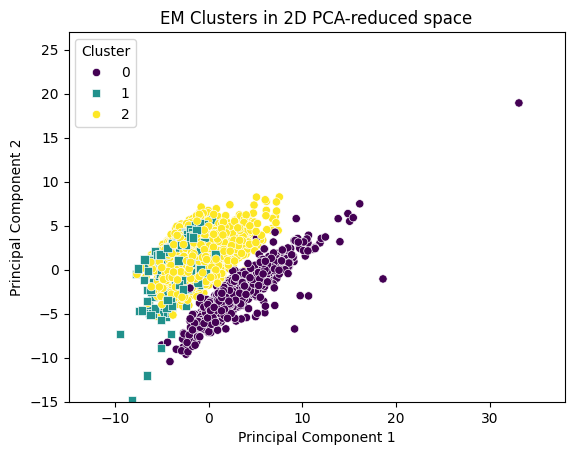

In [89]:
plt.xlim(-15,38)
plt.ylim(-15,27)
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', style='Cluster', markers=['o', 's'])
plt.title('EM Clusters in 2D PCA-reduced space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [90]:
cluster_centers = np.array([gmm.means_[label] for label in cluster_labels])

In [91]:
squared_distances = pairwise_distances(df_scaled, cluster_centers, metric='euclidean')**2

In [93]:
sse = np.sum(np.min(squared_distances, axis=1))

print(f'Sum of Squared Errors (SSE): {sse}')

Sum of Squared Errors (SSE): 280957.67238134914
